In [1]:
from keras.applications import VGG16
from src.vis import utils
from src.vis.utils import utils
from keras import activations
from keras.models import model_from_json
from src.models.model_manager import get_optimizer
from matplotlib import pyplot as plt



json_file = open('D:\Work\AITeam\multiclass_keras\models/model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# convert json to keras model file
model = model_from_json(loaded_model_json)
#load woeights into new model
model.load_weights("D:\Work\AITeam\multiclass_keras\models/model2.h5")
model.compile(loss='categorical_crossentropy', optimizer=get_optimizer())

print(model.summary())
layer_idx = utils.find_layer_idx(model, 'Dense_2')
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)
print(model.summary())

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Convolution2D_236 (Conv2D)      (None, 112, 112, 32) 896         Input_1[0][0]                    
__________________________________________________________________________________________________
Convolution2D_235 (Conv2D)      (None, 112, 112, 32) 9248        Convolution2D_236[0][0]          
__________________________________________________________________________________________________
Convolution2D_237 (Conv2D)      (None, 110, 110, 64) 18496       Convolution2D_235[0][0]          
__________________________________________________________________________________________________
MaxPooling

D:\Work\AITeam\multiclass_keras\venv\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Work\AITeam\multiclass_keras\venv\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


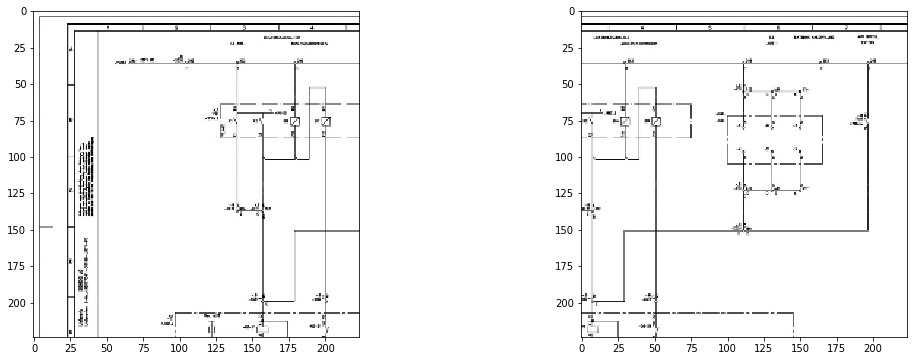

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)
img1 = utils.load_img('D:/Work\AITeam/multiclass_keras/data/processed/transformed/Etechnik_JPG_Plaene/Etechnik_JPG_Plaene6_0.jpg', target_size=(224, 224))
img2 = utils.load_img('D:/Work\AITeam/multiclass_keras/data/processed/transformed/Etechnik_JPG_Plaene/Etechnik_JPG_Plaene6_1.jpg', target_size=(224, 224))
f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [ ]:
from src.vis.visualization import visualize_activation
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

# 20 is the imagenet category for 'ouzel'
for x in range (5):
    img = visualize_activation(model, layer_idx, filter_indices=x)
    print(x)
    plt.figure(x+1)
    plt.imshow(img)

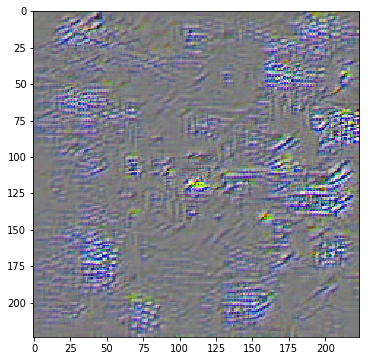

In [4]:
from src.vis.visualization import visualize_activation
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

# 20 is the imagenet category for 'ouzel'
img = visualize_activation(model, layer_idx, filter_indices=1)
plt.imshow(img)

ValueError: slice index 5 of dimension 1 out of bounds. for 'strided_slice_30' (op: 'StridedSlice') with input shapes: [?,5], [2], [2], [2] and with computed input tensors: input[1] = <0 5>, input[2] = <0 6>, input[3] = <1 1>.

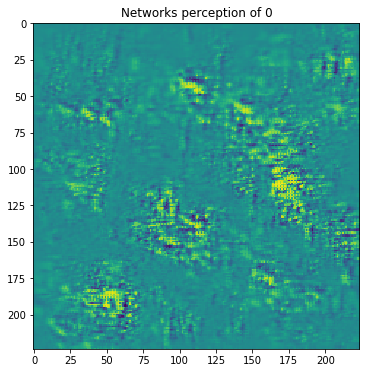

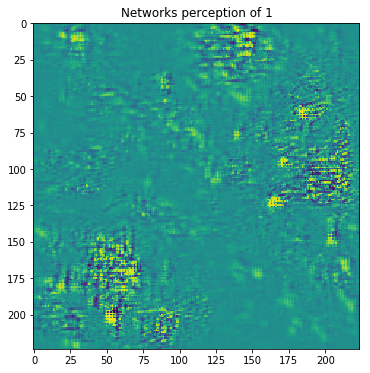

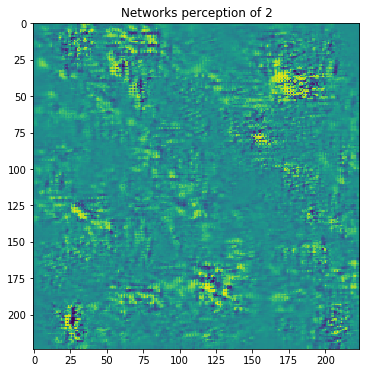

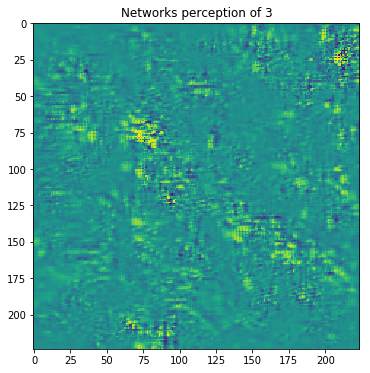

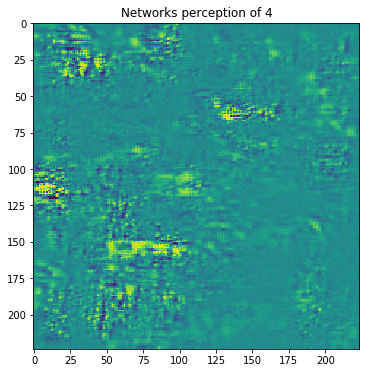

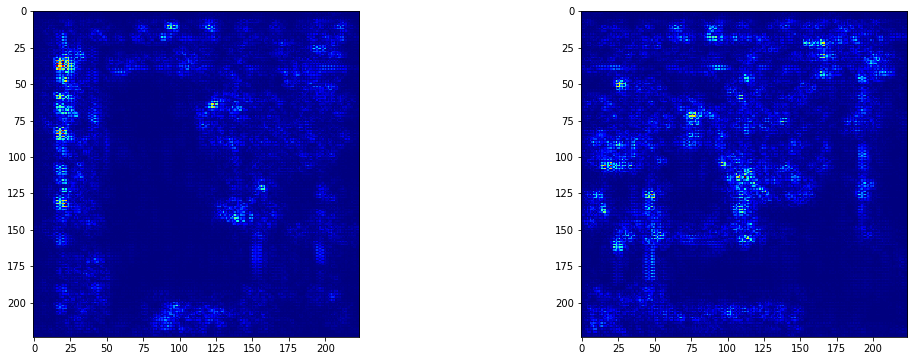

In [8]:
from src.vis.visualization import visualize_saliency, overlay
from src.vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'Dense_2')

f, ax = plt.subplots(1, 2)
for i, img in enumerate([img1, img2]):    
    # 20 is the imagenet index corresponding to `ouzel`
    grads = visualize_saliency(model, layer_idx, filter_indices=4, seed_input=img)
    
    # visualize grads as heatmap
    ax[i].imshow(grads, cmap='jet')

In [ ]:
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=4, 
                                   seed_input=img, backprop_modifier=modifier)
        print(grads)
        # Lets overlay the heatmap onto original image.    
        ax[i].imshow(grads, cmap='jet')

[[3.9033018e-04 4.7545087e-05 1.1142410e-03 ... 2.0425461e-04
  2.8518526e-04 3.9063896e-05]
 [3.6187597e-05 4.1798799e-04 5.5784255e-04 ... 4.2308954e-04
  1.9484998e-04 6.2639992e-05]
 [1.6680673e-03 6.0916634e-04 5.3855206e-04 ... 2.5713517e-04
  1.5984016e-03 1.2776899e-04]
 ...
 [9.5040881e-04 5.9727090e-04 7.6270202e-04 ... 5.5886497e-04
  1.3008524e-03 6.0077989e-04]
 [6.8842282e-04 1.9469317e-03 1.0479449e-03 ... 1.5992228e-03
  1.4485746e-03 9.3028077e-04]
 [1.5917483e-05 2.3899913e-04 5.5645517e-04 ... 2.0754876e-04
  8.5520302e-04 6.1857281e-04]]
[[7.2813146e-03 4.5625521e-03 5.8700508e-03 ... 2.2038001e-04
  2.9926997e-04 1.1528581e-04]
 [6.1207521e-03 3.4716171e-03 1.2282034e-02 ... 2.1194265e-04
  4.4294669e-05 3.5628116e-05]
 [3.7541182e-03 7.5760791e-03 9.1699222e-03 ... 6.1232236e-04
  1.4358053e-03 4.8882602e-04]
 ...
 [7.6847156e-03 9.8179257e-04 1.7793635e-02 ... 1.7180503e-03
  3.7461100e-03 2.2433491e-03]
 [3.7491121e-03 8.6244298e-03 8.6388616e-03 ... 4.7191111e-

<Figure size 1296x432 with 0 Axes>

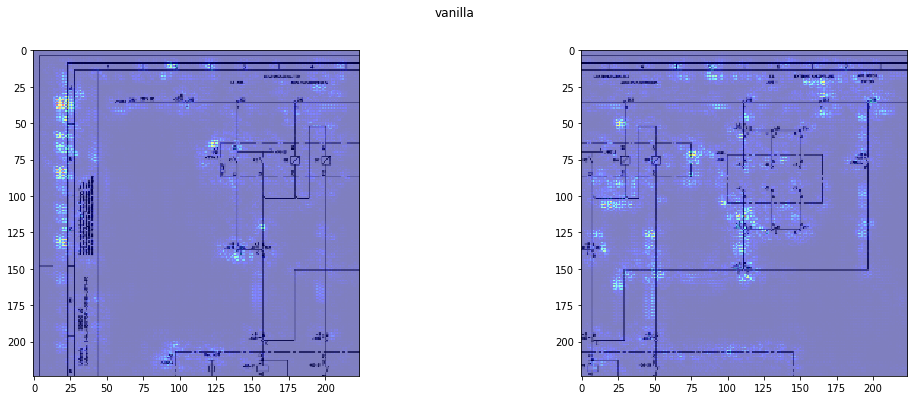

<Figure size 1296x432 with 0 Axes>

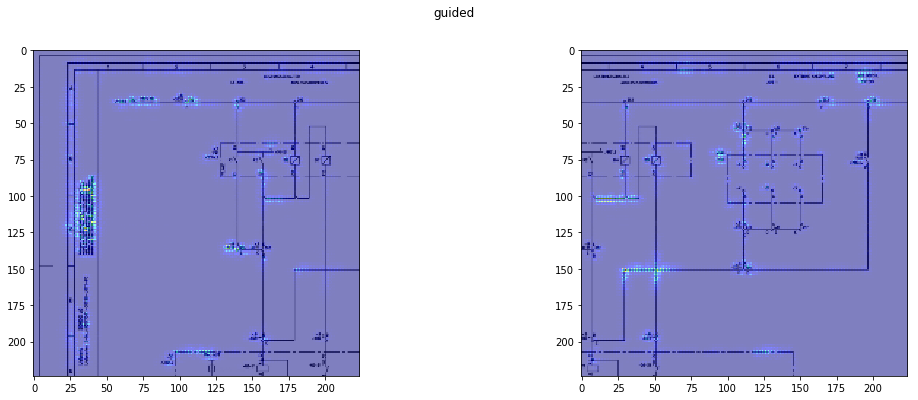

<Figure size 1296x432 with 0 Axes>

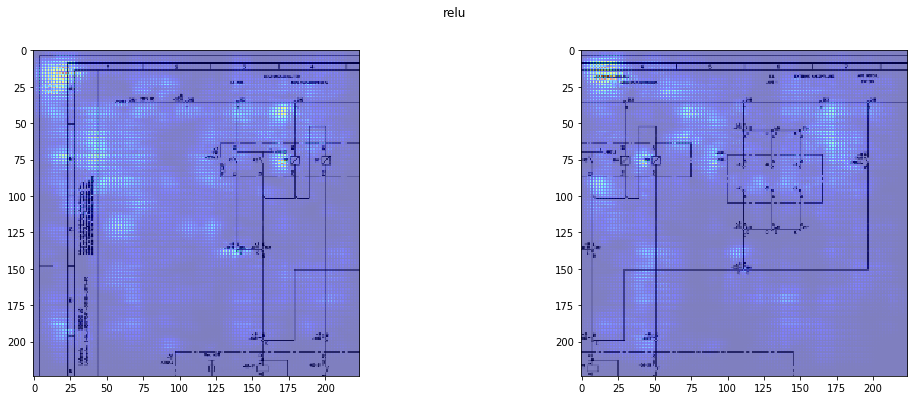

In [9]:
import numpy as np
import matplotlib.cm as cm
from src.vis.visualization import visualize_cam, visualize_saliency, overlay

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)

        
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=4, 
                                   seed_input=img, backprop_modifier=modifier)
        print(grads)
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))
    

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Convolution2D_236 (Conv2D)      (None, 112, 112, 32) 896         Input_1[0][0]                    
__________________________________________________________________________________________________
Convolution2D_235 (Conv2D)      (None, 112, 112, 32) 9248        Convolution2D_236[0][0]          
__________________________________________________________________________________________________
Convolution2D_237 (Conv2D)      (None, 110, 110, 64) 18496       Convolution2D_235[0][0]          
__________________________________________________________________________________________________
MaxPooling

<Figure size 1296x432 with 0 Axes>

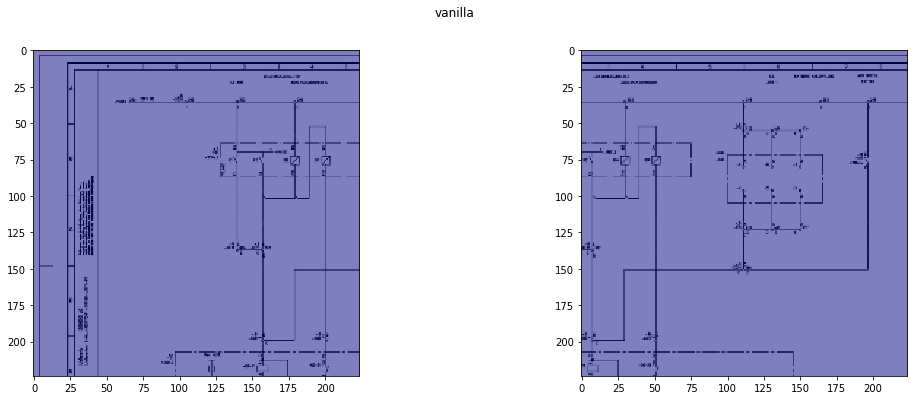

<Figure size 1296x432 with 0 Axes>

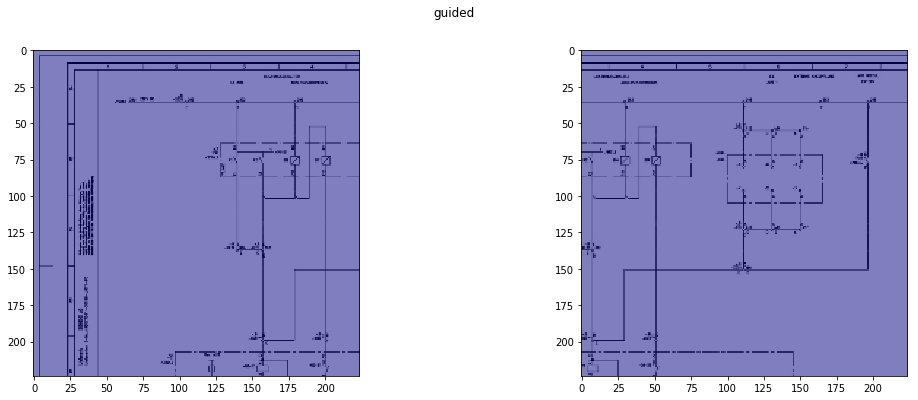

<Figure size 1296x432 with 0 Axes>

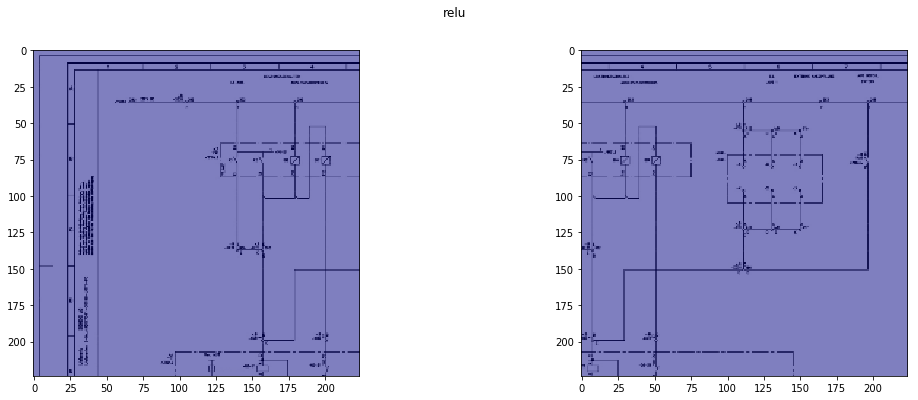

In [12]:
import numpy as np
import matplotlib.cm as cm
from src.vis.visualization import visualize_cam, visualize_saliency
print(model.summary())
print('idx')
layer_idx = utils.find_layer_idx(model, 'Dense_2')
print(layer_idx)
print('idxend')

   
for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)

        

    for i, img in enumerate([img1, img2]):   
        try:
            l_index = len(model.layers)-1-x
            print(x)
            # 20 is the imagenet index corresponding to `ouzel`
            grads = visualize_cam(model,layer_idx , filter_indices=4, 
                                   seed_input=img, backprop_modifier=modifier)  
            #print('cam')
            #print(grads)
            print(x)
            # Lets overlay the heatmap onto original image.    
            jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
            ax[i].imshow(overlay(jet_heatmap, img))
        except ValueError:
            print('error')

In [16]:
from src.vis.visualization import visualize_cam

# This corresponds to the Dense linear layer.
for class_idx in np.arange(10): 
    indices = np.where(val_y[:, class_idx] == 1.)[0]
    idx = indices[0]

f, ax = plt.subplots(1, 4)
ax[0].imshow(val_x[idx][..., 0])
 
for i, modifier in enumerate([None, 'guided', 'relu']):
    grads = visualize_cam(model, layer_idx, filter_indices=class_idx, 
    seed_input=val_x[idx], backprop_modifier=modifier) 
    if modifier is None:
        modifier = 'vanilla'
    ax[i+1].set_title(modifier) 
    ax[i+1].imshow(grads, cmap='jet')

NameError: name 'val_y' is not defined

In [ ]:
from src.vis.visualization import visualize_activation
for y in range(34):
    print(y)
    img = visualize_activation(model, y, filter_indices=1)
    plt.figure(y+1)
    plt.imshow(img)
    